In [85]:
import numpy as np
import pandas as pd

# All the direct flights from Tallinn airport 
cities = pd.read_csv('otselennud.csv', delimiter=";")
airport_data = pd.read_csv('airport_data.csv')

# Add coordinates to the data file
merged = pd.merge(cities, airport_data, on='IATA', how='left')

# Save the data to csv file
merged.to_csv('final.csv')

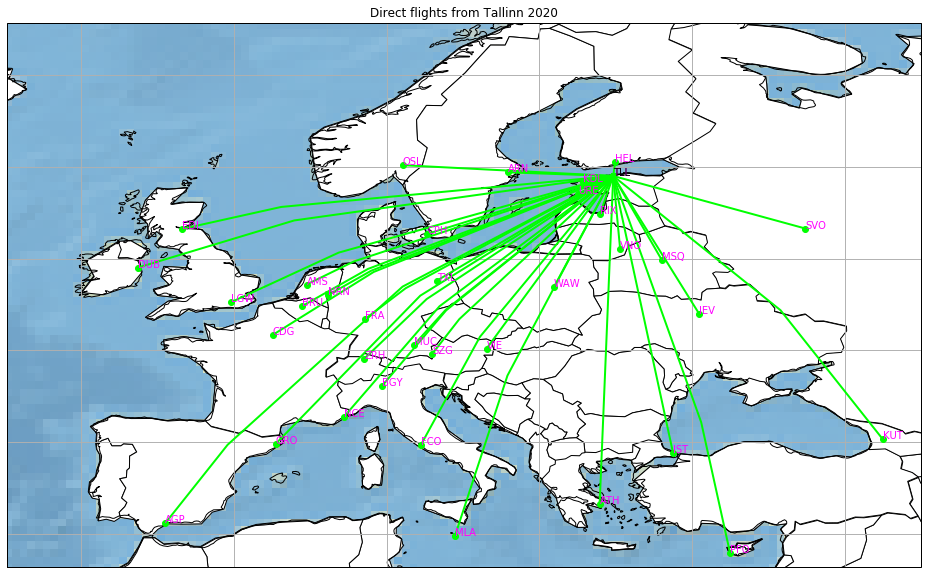

In [86]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Starting coordinates -> Tallinn
tll_marker, tll_lon, tll_lat = 'TLL', 24.8327999115, 59.41329956049999

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.set_extent([-14.8327999115, 45, 33.8327999115, 69.41329956049999], crs=ccrs.PlateCarree())
ax.gridlines()

# Add color to the countries
shpf = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpf)
countries = reader.records()
for country in countries:
    ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=(1,1,1), linewidth=1, edgecolor='black')




ax.coastlines(resolution='50m')
ax.gridlines()

for i, row in merged.iterrows():
    # Get coordnates and marker name of the city
    marker, lat, lon = (row['IATA'], row['Latitude'], row['Longitude'])
    
    # Write the marker to the map
    plt.text(lon, lat, marker,
        horizontalalignment='left',
        color="magenta",
        transform=ccrs.Geodetic())
    
    # Draw the line
    plt.plot([tll_lon, lon], [tll_lat, lat],
         color='lime', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

    

plt.text(tll_lon, tll_lat,tll_marker, horizontalalignment='left', transform=ccrs.Geodetic())
plt.title('Direct flights from Tallinn 2020')

plt.savefig('tallinn_flights.png')
plt.show()